In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


In [97]:
df = pd.read_csv('./data/BankChurners.csv')
df =df.drop(columns = df.columns[-2:])
df.replace({'Unknown':np.nan},inplace=True)
df = df.dropna()

In [92]:
# numerical_columns_selector = selector(dtype_exclude=object)
# categorical_columns_selector = selector(dtype_include=object)
# numerical_columns = numerical_columns_selector(df)         
# categorical_columns = categorical_columns_selector(df)
    
categorical_preprocessor = OrdinalEncoder() 
df[categorical_columns]=categorical_preprocessor.fit_transform(df[categorical_columns])
data = df.drop(columns = 'Attrition_Flag')
target = df['Attrition_Flag']
    
numerical_preprocessor = StandardScaler()
df = numerical_preprocessor.fit_transform(data)
    
    
#imbalanced_preprocessor = SMOTE(random_state=0) # balancing the imbalanced class using SMOTE
#data, target = imbalanced_preprocessor.fit_resample(data, target)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

In [117]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_test_preds_LR = LR.predict(X_test)
y_train_preds_LR = LR.predict(X_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [118]:
np.unique(y_test_preds_LR)

array([0., 1.])

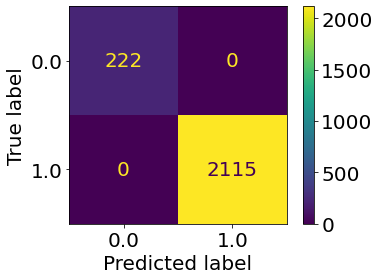

In [119]:
plot_confusion_matrix(LR,X_test, y_test_preds_LR)

In [120]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_test_preds_LR = LR.predict(X_test)
y_train_preds_LR = LR.predict(X_train)
    
XGB = XGBClassifier(eval_metric='mlogloss')
XGB.fit(X_train,y_train)
y_test_preds_XGB = XGB.predict(X_test)
y_train_preds_XGB = XGB.predict(X_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


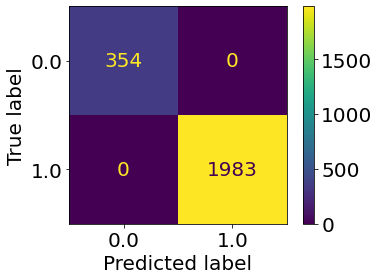

In [121]:
plot_confusion_matrix(XGB,X_test, y_test_preds_XGB)

In [75]:
# report =classification_report(y_test, y_test_preds_XGB,output_dict=True)
# df = pd.DataFrame(report).transpose()
        

In [22]:
df.

,precision,recall,f1-score,support
0.0,0.979835,0.981865,0.980849,1930.000000
1.0,0.982544,0.980587,0.981565,2009.000000
accuracy,0.981214,0.981214,0.981214,0.981214
macro avg,0.981189,0.981226,0.981207,3939.000000
weighted avg,0.981216,0.981214,0.981214,3939.000000


Text(0.1, 0.1, '              precision    recall  f1-score   support\n\n         0.0       0.98      0.98      0.98      1930\n         1.0       0.98      0.98      0.98      2009\n\n    accuracy                           0.98      3939\n   macro avg       0.98      0.98      0.98      3939\nweighted avg       0.98      0.98      0.98      3939\n')

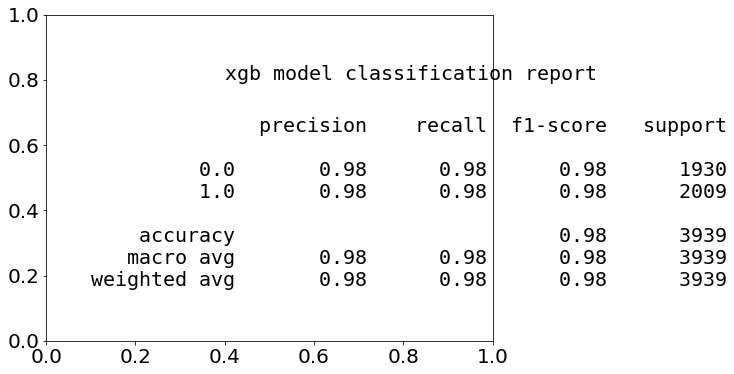

In [63]:

plt.figure(figsize=(8,6))
plt.text(0.4,0.8 ,"xgb model classification report", {'fontsize': 20}, fontproperties = 'monospace')
plt.text(0.1, 0.1,classification_report(y_test, y_test_preds_XGB),{'fontsize': 20}, fontproperties = 'monospace')


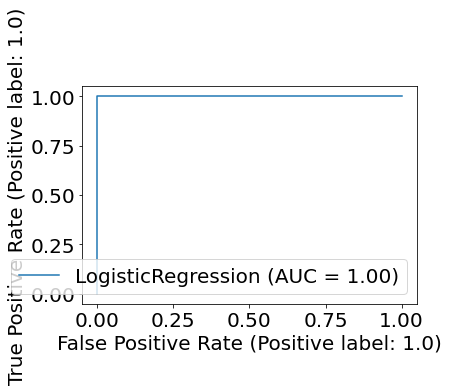

In [122]:
plot_roc_curve(LR,X_test, y_test_preds_LR)

In [10]:
from sklearn.metrics import precision_score, f1_score, recall_score
model_df = {
    "Model Name" : ["Logistic Regression"],
    "Precision" : [precision_score(X_test, y_test_preds_XGB)],
    "F1-score":[f1_score(X_test, y_test_preds_XGB)],
    "Recall": [recall_score(X_test, y_test_preds_XGB)]
}

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


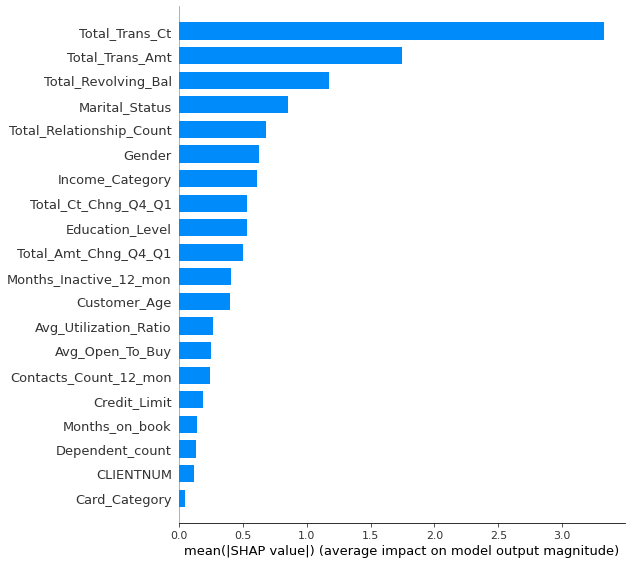

In [52]:
import shap
explainer = shap.TreeExplainer(XGB)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [53]:
RFC = RandomForestClassifier()
param_grid_RFC = { 
        'n_estimators': [200, 700],
        'max_features': ['auto', 'sqrt', 'log2']
    }

CV_RFC = GridSearchCV(estimator=RFC, param_grid=param_grid_RFC, cv= 5)
CV_RFC.fit(X_train, y_train)
y_test_preds_RFC = CV_RFC.predict(X_test)
y_train_preds_RFC = CV_RFC.predict(X_train)

In [55]:
explainer = shap.TreeExplainer(CV_RFC)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

Exception: Model type not yet supported by TreeExplainer: <class 'sklearn.model_selection._search.GridSearchCV'>

In [77]:
classification_report(XGB, X_test, y_test_preds_XGB)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[0. 0. 0. ... 1. 0. 1.] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


TypeError: Expected sequence or array-like, got <class 'xgboost.sklearn.XGBClassifier'>

In [100]:
category_lst =  ["Gender",
                "Education_Level",
                "Marital_Status",
                "Income_Category",
                "Card_Category"]

for category_name in category_lst:
    category_lst = []
    category_groups = df.groupby(category_name).mean()["Attrition_Flag"]
    for val in df[category_name]:
        category_lst.append(category_groups.loc[val])
    df["%s_%s" % (category_name, "Churn")] = category_lst


In [99]:
df["Attrition_Flag"] = df.Attrition_Flag.apply(
        lambda val: 0 if val == "Existing Customer" else 1)

In [112]:
keep_cols = [
        "Customer_Age",
        "Dependent_count",
        "Months_on_book",
        "Total_Relationship_Count",
        "Months_Inactive_12_mon",
        "Contacts_Count_12_mon",
        "Credit_Limit",
        "Total_Revolving_Bal",
        "Avg_Open_To_Buy",
        "Total_Amt_Chng_Q4_Q1",
        "Total_Trans_Amt",
        "Total_Trans_Ct",
        "Total_Ct_Chng_Q4_Q1",
        "Avg_Utilization_Ratio",
        "Gender_Churn",
        "Education_Level_Churn",
        "Marital_Status_Churn",
        "Income_Category_Churn",
        "Card_Category_Churn"]

data = df[keep_cols]

In [114]:
data

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_Churn,Education_Level_Churn,Marital_Status_Churn,Income_Category_Churn,Card_Category_Churn
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.144900,0.143376,0.148429,0.131460,0.156714
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.170667,0.156696,0.166893,0.169413,0.156714
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.144900,0.156696,0.148429,0.157238,0.156714
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.144900,0.154485,0.148429,0.131460,0.156714
5,44,2,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.144900,0.156696,0.148429,0.144476,0.156714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,54,1,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151,0.144900,0.143376,0.166893,0.131460,0.156714
10121,56,1,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,0.170667,0.156696,0.166893,0.169413,0.156714
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.144900,0.156696,0.166893,0.144476,0.156714
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.170667,0.143376,0.148429,0.169413,0.156714


In [115]:
target

0        1.0
1        1.0
2        1.0
4        1.0
5        1.0
        ... 
10120    1.0
10121    1.0
10122    1.0
10124    0.0
10126    0.0
Name: Attrition_Flag, Length: 7081, dtype: float64

In [116]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)